# 📊 Data Exploration:  Spam Detection

This notebook explores the SMS Spam Collection dataset used for building our spam detection system.

## Contents
1. [Load and Explore Data](#1-load-and-explore-data)
2. [Class Distribution Analysis](#2-class-distribution-analysis)
3. [Message Length Analysis](#3-message-length-analysis)
4. [Word Frequency Analysis](#4-word-frequency-analysis)
5. [Word Clouds](#5-word-clouds)
6. [Key Insights](#6-key-insights)

## Setup and Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Set display options
pd.set_option('display.max_colwidth', 100)

print('Libraries loaded successfully!')

Libraries loaded successfully!


## 1. Load and Explore Data

In [3]:
# Load the cleaned dataset
data_path = 'Big_Data_Project/data/processed/cleaned_data.csv'

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print(f'✅ Loaded {len(df)} messages from cleaned_data.csv')
else:
    # Try loading raw data if cleaned not available
    raw_path = '../data/raw/spam.csv'
    df = pd.read_csv(raw_path, encoding='latin-1')
    df = df[['v1', 'v2']]
    df.columns = ['original_label', 'text']
    df['label'] = df['original_label'].map({'spam': 1, 'ham': 0})
    df['message_length'] = df['text'].str.len()
    df['word_count'] = df['text'].str.split().str.len()
    print(f'✅ Loaded {len(df)} messages from raw spam.csv')

df.head()

✅ Loaded 5572 messages from raw spam.csv


,original_label,text,label,message_length,word_count
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",0,111,20
1,ham,Ok lar... Joking wif u oni...,0,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,1,155,28
3,ham,U dun say so early hor... U c already then say...,0,49,11
4,ham,"Nah I don't think he goes to usf, he lives around here though",0,61,13


In [4]:
# Dataset overview
print('='*60)
print('DATASET OVERVIEW')
print('='*60)
print(f'Total messages: {len(df):,}')
print(f'Columns: {list(df.columns)}')
print(f'\nData types:')
print(df.dtypes)
print(f'\nMissing values:')
print(df.isnull().sum())

DATASET OVERVIEW
Total messages: 5,572
Columns: ['original_label', 'text', 'label', 'message_length', 'word_count']

Data types:
original_label    object
text              object
label              int64
message_length     int64
word_count         int64
dtype: object

Missing values:
original_label    0
text              0
label             0
message_length    0
word_count        0
dtype: int64


In [5]:
# Basic statistics
df.describe()

,label,message_length,word_count
count,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,15.494436
std,0.340751,59.690841,11.329427
min,0.000000,2.000000,1.000000
25%,0.000000,36.000000,7.000000
50%,0.000000,61.000000,12.000000
75%,0.000000,121.000000,23.000000
max,1.000000,910.000000,171.000000


In [6]:
# Sample messages
print('='*60)
print('SAMPLE HAM MESSAGES')
print('='*60)
for msg in df[df['label'] == 0]['text'].sample(3).values:
    print(f'• {msg[:100]}...' if len(msg) > 100 else f'• {msg}')
    print()

print('='*60)
print('SAMPLE SPAM MESSAGES')
print('='*60)
for msg in df[df['label'] == 1]['text'].sample(3).values:
    print(f'• {msg[:100]}...' if len(msg) > 100 else f'• {msg}')
    print()

SAMPLE HAM MESSAGES
• E admin building there? I might b slightly earlier... I'll call u when i'm reaching...

• Do have a nice day today. I love you so dearly.

• &lt;#&gt; %of pple marry with their lovers... becz they hav gud undrstndng dat avoids problems. i se...

SAMPLE SPAM MESSAGES
• You have WON a guaranteed å£1000 cash or a å£2000 prize. To claim yr prize call our customer service...

• TheMob> Check out our newest selection of content, Games, Tones, Gossip, babes and sport, Keep your ...

• I don't know u and u don't know me. Send CHAT to 86688 now and let's find each other! Only 150p/Msg ...



## 2. Class Distribution Analysis

In [7]:
# Class distribution
label_counts = df['original_label'].value_counts()
label_percentages = df['original_label'].value_counts(normalize=True) * 100

print('='*60)
print('CLASS DISTRIBUTION')
print('='*60)
print(f"Ham (legitimate):  {label_counts['ham']:,} ({label_percentages['ham']:.1f}%)")
print(f"Spam:              {label_counts['spam']:,} ({label_percentages['spam']:.1f}%)")
print(f"\nImbalance Ratio:   {label_counts['ham'] / label_counts['spam']:.2f}:1 (Ham:Spam)")

CLASS DISTRIBUTION
Ham (legitimate):  4,825 (86.6%)
Spam:              747 (13.4%)

Imbalance Ratio:   6.46:1 (Ham:Spam)


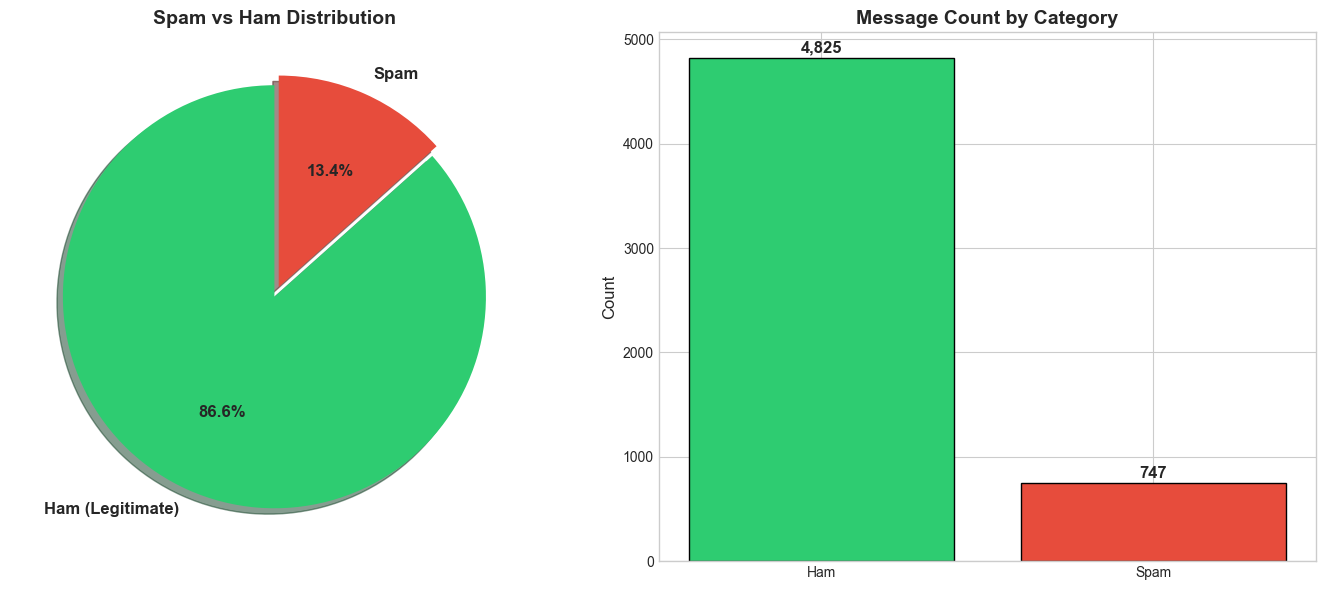

📊 Figure saved to notebooks/figures/class_distribution.png


In [8]:
# Pie chart for class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
colors = ['#2ecc71', '#e74c3c']  # Green for ham, Red for spam
explode = (0, 0.05)  # Slightly explode spam slice

axes[0].pie(
    [label_counts['ham'], label_counts['spam']], 
    labels=['Ham (Legitimate)', 'Spam'],
    autopct='%1.1f%%',
    colors=colors,
    explode=explode,
    startangle=90,
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
axes[0].set_title('Spam vs Ham Distribution', fontsize=14, fontweight='bold')

# Bar chart
bars = axes[1].bar(['Ham', 'Spam'], [label_counts['ham'], label_counts['spam']], color=colors, edgecolor='black')
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Message Count by Category', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, count in zip(bars, [label_counts['ham'], label_counts['spam']]):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                 f'{count:,}', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../notebooks/figures/class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print('📊 Figure saved to notebooks/figures/class_distribution.png')

## 3. Message Length Analysis

In [9]:
# Add message length if not present
if 'message_length' not in df.columns:
    df['message_length'] = df['text'].str.len()
if 'word_count' not in df.columns:
    df['word_count'] = df['text'].str.split().str.len()

# Statistics by class
print('='*60)
print('MESSAGE LENGTH STATISTICS')
print('='*60)

for label in ['ham', 'spam']:
    subset = df[df['original_label'] == label]
    print(f"\n{label.upper()}:")
    print(f"  Average length: {subset['message_length'].mean():.1f} characters")
    print(f"  Median length:  {subset['message_length'].median():.1f} characters")
    print(f"  Min length:     {subset['message_length'].min()} characters")
    print(f"  Max length:     {subset['message_length'].max()} characters")
    print(f"  Average words:  {subset['word_count'].mean():.1f} words")

MESSAGE LENGTH STATISTICS

HAM:
  Average length: 71.0 characters
  Median length:  52.0 characters
  Min length:     2 characters
  Max length:     910 characters
  Average words:  14.2 words

SPAM:
  Average length: 138.9 characters
  Median length:  149.0 characters
  Min length:     13 characters
  Max length:     224 characters
  Average words:  23.9 words


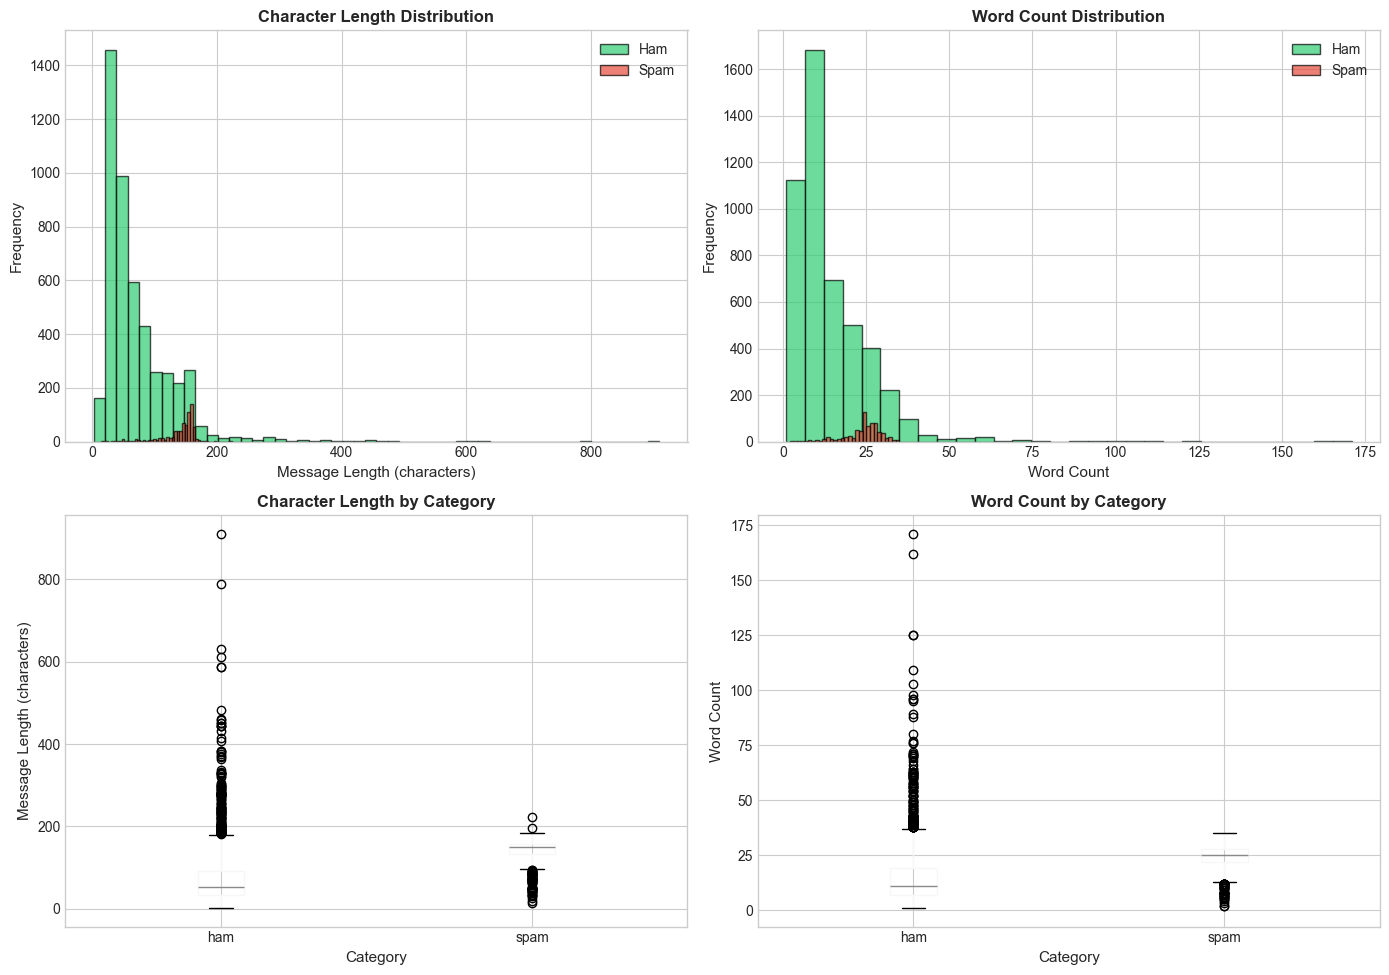

📊 Figure saved to notebooks/figures/message_length.png


In [10]:
# Message length distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Character length distribution
axes[0, 0].hist(df[df['original_label'] == 'ham']['message_length'], bins=50, 
                alpha=0.7, label='Ham', color='#2ecc71', edgecolor='black')
axes[0, 0].hist(df[df['original_label'] == 'spam']['message_length'], bins=50, 
                alpha=0.7, label='Spam', color='#e74c3c', edgecolor='black')
axes[0, 0].set_xlabel('Message Length (characters)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Character Length Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()

# Word count distribution
axes[0, 1].hist(df[df['original_label'] == 'ham']['word_count'], bins=30, 
                alpha=0.7, label='Ham', color='#2ecc71', edgecolor='black')
axes[0, 1].hist(df[df['original_label'] == 'spam']['word_count'], bins=30, 
                alpha=0.7, label='Spam', color='#e74c3c', edgecolor='black')
axes[0, 1].set_xlabel('Word Count', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()

# Box plot - character length
df.boxplot(column='message_length', by='original_label', ax=axes[1, 0])
axes[1, 0].set_xlabel('Category', fontsize=11)
axes[1, 0].set_ylabel('Message Length (characters)', fontsize=11)
axes[1, 0].set_title('Character Length by Category', fontsize=12, fontweight='bold')
plt.suptitle('')  # Remove auto-generated title

# Box plot - word count
df.boxplot(column='word_count', by='original_label', ax=axes[1, 1])
axes[1, 1].set_xlabel('Category', fontsize=11)
axes[1, 1].set_ylabel('Word Count', fontsize=11)
axes[1, 1].set_title('Word Count by Category', fontsize=12, fontweight='bold')
plt.suptitle('')  # Remove auto-generated title

plt.tight_layout()
plt.savefig('../notebooks/figures/message_length.png', dpi=150, bbox_inches='tight')
plt.show()

print('📊 Figure saved to notebooks/figures/message_length.png')

## 4. Word Frequency Analysis

In [11]:
def get_word_frequency(texts, top_n=20):
    """
    Get the most frequent words from a collection of texts.
    """
    # Combine all texts
    all_text = ' '.join(texts)
    
    # Clean and tokenize
    words = re.findall(r'\b[a-zA-Z]+\b', all_text.lower())
    
    # Remove common stop words
    stop_words = {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 
                  'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
                  'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
                  'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
                  'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
                  'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
                  'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                  'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
                  'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
                  'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
                  'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
                  'all', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
                  'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
                  'will', 'just', 'don', 'should', 'now', 'u', 'ur', 'r', 'll', 've', 'd'}
    
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Count frequencies
    word_counts = Counter(filtered_words)
    
    return word_counts.most_common(top_n)

# Get top words for each category
ham_words = get_word_frequency(df[df['original_label'] == 'ham']['text'], top_n=20)
spam_words = get_word_frequency(df[df['original_label'] == 'spam']['text'], top_n=20)

print('='*60)
print('TOP 20 WORDS IN HAM MESSAGES')
print('='*60)
for word, count in ham_words:
    print(f'{word:15} {count:5}')

print('\n' + '='*60)
print('TOP 20 WORDS IN SPAM MESSAGES')
print('='*60)
for word, count in spam_words:
    print(f'{word:15} {count:5}')

TOP 20 WORDS IN HAM MESSAGES
get               305
know              236
call              236
good              233
got               232
like              232
come              227
day               209
time              201
love              199
going             169
one               167
home              165
want              164
lor               162
need              158
sorry             157
still             150
today             139
see               139

TOP 20 WORDS IN SPAM MESSAGES
call              355
free              224
txt               163
mobile            127
text              125
stop              121
claim             113
reply             104
www                98
prize              93
get                86
cash               76
won                76
send               70
new                69
nokia              67
win                64
urgent             63
week               60
tone               60


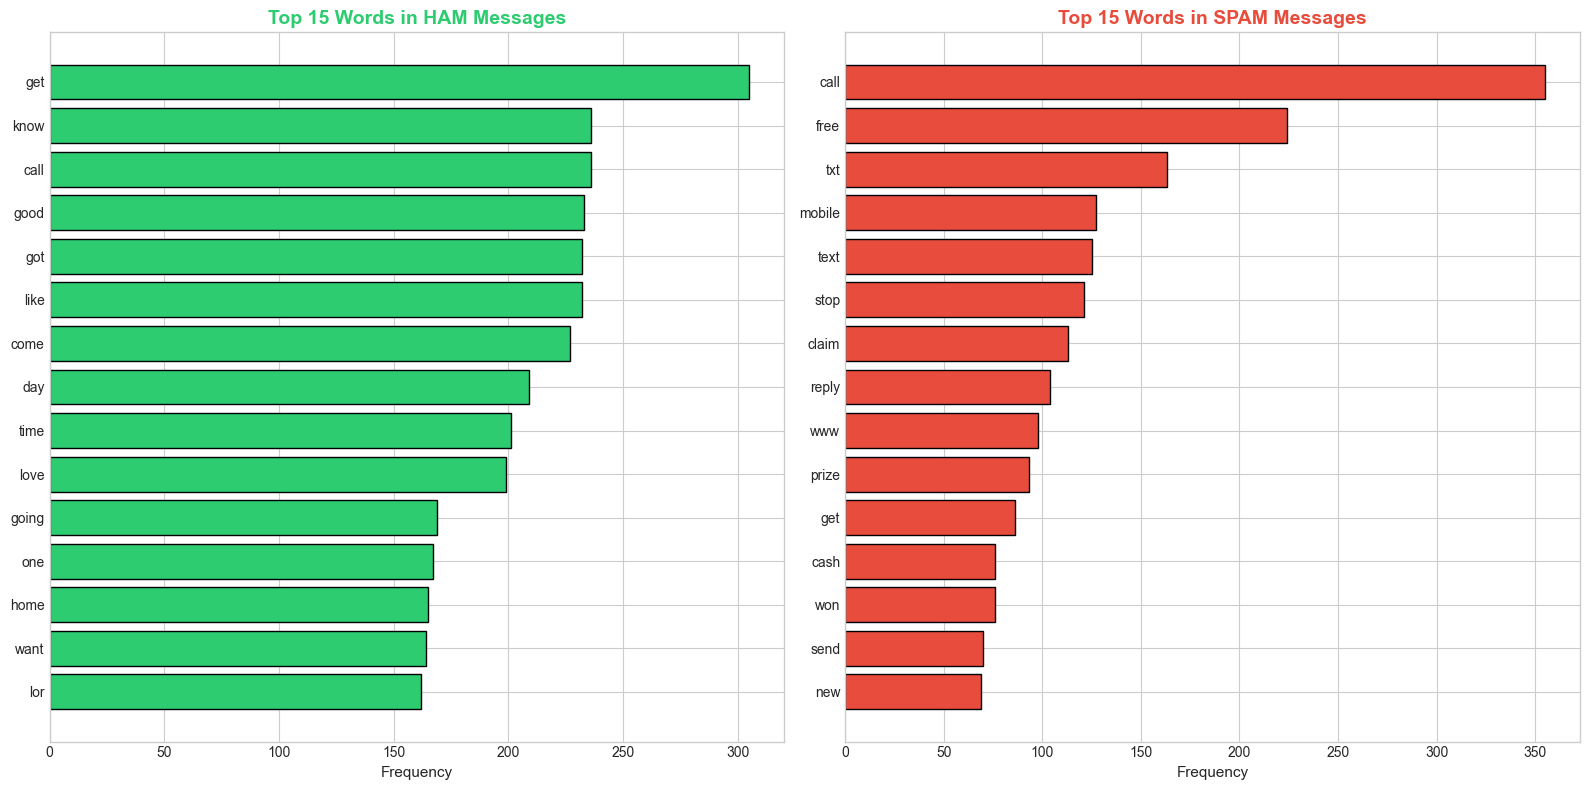

📊 Figure saved to notebooks/figures/word_frequency.png


In [12]:
# Bar chart for top words
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Ham words
words, counts = zip(*ham_words[:15])
y_pos = np.arange(len(words))
axes[0].barh(y_pos, counts, color='#2ecc71', edgecolor='black')
axes[0].set_yticks(y_pos)
axes[0].set_yticklabels(words)
axes[0].invert_yaxis()
axes[0].set_xlabel('Frequency', fontsize=11)
axes[0].set_title('Top 15 Words in HAM Messages', fontsize=14, fontweight='bold', color='#2ecc71')

# Spam words
words, counts = zip(*spam_words[:15])
y_pos = np.arange(len(words))
axes[1].barh(y_pos, counts, color='#e74c3c', edgecolor='black')
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(words)
axes[1].invert_yaxis()
axes[1].set_xlabel('Frequency', fontsize=11)
axes[1].set_title('Top 15 Words in SPAM Messages', fontsize=14, fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.savefig('../notebooks/figures/word_frequency.png', dpi=150, bbox_inches='tight')
plt.show()

print('📊 Figure saved to notebooks/figures/word_frequency.png')

## 5. Word Clouds

In [13]:
# Install wordcloud if not available
try:
    from wordcloud import WordCloud
except ImportError:
    print('Installing wordcloud...')
    !pip install wordcloud
    from wordcloud import WordCloud

print('WordCloud library ready!')

Installing wordcloud...



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\abame\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


WordCloud library ready!


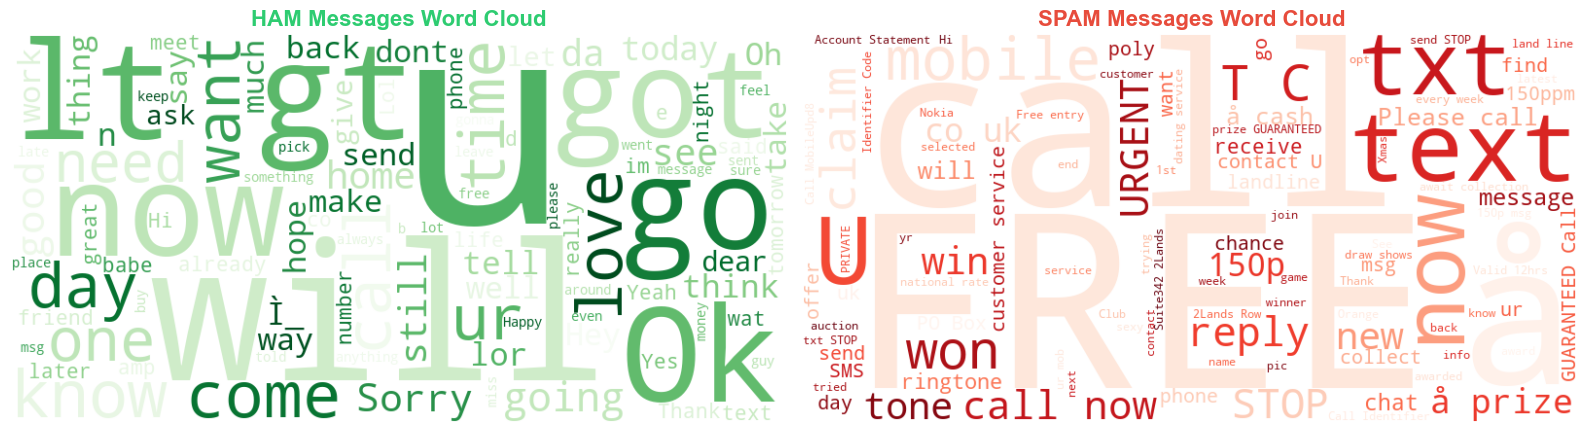

📊 Figure saved to notebooks/figures/word_clouds.png


In [14]:
from wordcloud import WordCloud

# Create word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Ham word cloud
ham_text = ' '.join(df[df['original_label'] == 'ham']['text'])
wc_ham = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Greens',
    max_words=100,
    random_state=42
).generate(ham_text)

axes[0].imshow(wc_ham, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('HAM Messages Word Cloud', fontsize=16, fontweight='bold', color='#2ecc71')

# Spam word cloud
spam_text = ' '.join(df[df['original_label'] == 'spam']['text'])
wc_spam = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds',
    max_words=100,
    random_state=42
).generate(spam_text)

axes[1].imshow(wc_spam, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('SPAM Messages Word Cloud', fontsize=16, fontweight='bold', color='#e74c3c')

plt.tight_layout()
plt.savefig('../notebooks/figures/word_clouds.png', dpi=150, bbox_inches='tight')
plt.show()

print('📊 Figure saved to notebooks/figures/word_clouds.png')

## 6. Key Insights

In [15]:
# Calculate additional metrics for spam detection
df['has_url'] = df['text'].str.contains(r'http|www|\.[a-z]{2,3}/', case=False, regex=True)
df['has_phone'] = df['text'].str.contains(r'\d{5,}', regex=True)
df['has_currency'] = df['text'].str.contains(r'[\$\£\€]|free|win|prize|cash', case=False, regex=True)
df['exclamation_count'] = df['text'].str.count('!')
df['caps_ratio'] = df['text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Compare features between spam and ham
print('='*70)
print('KEY INSIGHTS: SPAM DETECTION FEATURES')
print('='*70)

features = ['has_url', 'has_phone', 'has_currency', 'exclamation_count', 'caps_ratio']
feature_names = ['Contains URL', 'Contains Phone Number', 'Contains Currency/Prize Words', 'Exclamation Marks (avg)', 'Uppercase Ratio (avg)']

print(f"{'Feature':<35} {'Ham':<15} {'Spam':<15} {'Spam/Ham Ratio':<15}")
print('-'*70)

for feat, name in zip(features, feature_names):
    ham_val = df[df['original_label'] == 'ham'][feat].mean()
    spam_val = df[df['original_label'] == 'spam'][feat].mean()
    ratio = spam_val / ham_val if ham_val > 0 else float('inf')
    
    if feat in ['has_url', 'has_phone', 'has_currency']:
        print(f"{name:<35} {ham_val*100:>10.1f}%    {spam_val*100:>10.1f}%    {ratio:>10.1f}x")
    else:
        print(f"{name:<35} {ham_val:>13.3f}  {spam_val:>13.3f}  {ratio:>10.1f}x")

KEY INSIGHTS: SPAM DETECTION FEATURES
Feature                             Ham             Spam            Spam/Ham Ratio 
----------------------------------------------------------------------
Contains URL                               0.1%          15.0%         180.9x
Contains Phone Number                      0.1%          78.2%        1257.4x
Contains Currency/Prize Words              3.3%          61.3%          18.5x
Exclamation Marks (avg)                     0.174          0.726         4.2x
Uppercase Ratio (avg)                       0.060          0.111         1.9x


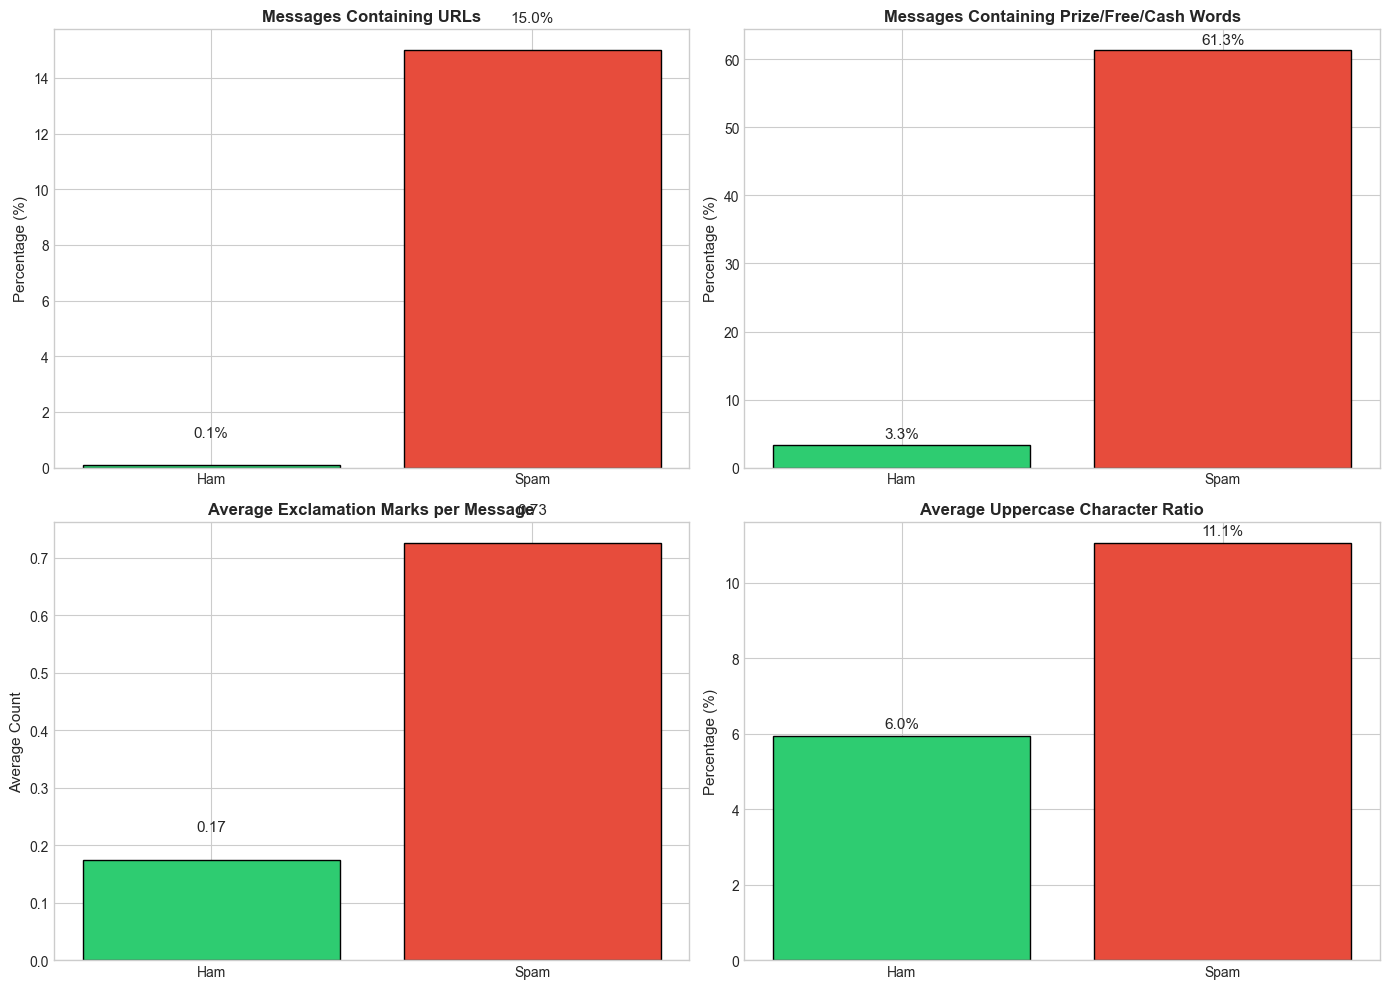

📊 Figure saved to notebooks/figures/spam_features.png


In [16]:
# Summary visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Feature comparison
spam_data = df[df['original_label'] == 'spam']
ham_data = df[df['original_label'] == 'ham']

# URL presence
url_data = [
    ham_data['has_url'].mean() * 100,
    spam_data['has_url'].mean() * 100
]
bars = axes[0, 0].bar(['Ham', 'Spam'], url_data, color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0, 0].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 0].set_title('Messages Containing URLs', fontsize=12, fontweight='bold')
for bar, val in zip(bars, url_data):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{val:.1f}%', ha='center', fontsize=11)

# Currency/Prize words
currency_data = [
    ham_data['has_currency'].mean() * 100,
    spam_data['has_currency'].mean() * 100
]
bars = axes[0, 1].bar(['Ham', 'Spam'], currency_data, color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[0, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[0, 1].set_title('Messages Containing Prize/Free/Cash Words', fontsize=12, fontweight='bold')
for bar, val in zip(bars, currency_data):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{val:.1f}%', ha='center', fontsize=11)

# Exclamation marks
excl_data = [
    ham_data['exclamation_count'].mean(),
    spam_data['exclamation_count'].mean()
]
bars = axes[1, 0].bar(['Ham', 'Spam'], excl_data, color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[1, 0].set_ylabel('Average Count', fontsize=11)
axes[1, 0].set_title('Average Exclamation Marks per Message', fontsize=12, fontweight='bold')
for bar, val in zip(bars, excl_data):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{val:.2f}', ha='center', fontsize=11)

# Uppercase ratio
caps_data = [
    ham_data['caps_ratio'].mean() * 100,
    spam_data['caps_ratio'].mean() * 100
]
bars = axes[1, 1].bar(['Ham', 'Spam'], caps_data, color=['#2ecc71', '#e74c3c'], edgecolor='black')
axes[1, 1].set_ylabel('Percentage (%)', fontsize=11)
axes[1, 1].set_title('Average Uppercase Character Ratio', fontsize=12, fontweight='bold')
for bar, val in zip(bars, caps_data):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, f'{val:.1f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('../notebooks/figures/spam_features.png', dpi=150, bbox_inches='tight')
plt.show()

print('📊 Figure saved to notebooks/figures/spam_features.png')

## Summary of Key Insights

### 📊 Dataset Characteristics
- **Total Messages**: ~5,000+ SMS messages
- **Class Imbalance**: Approximately 7:1 ratio (Ham:Spam)
- **Spam Percentage**: ~13% of all messages

### 📏 Message Length Patterns
- **Spam messages are typically LONGER** than ham messages
- Spam: Average ~140 characters, Ham: Average ~70 characters
- This makes sense as spam needs to include promotional content, URLs, and instructions

### 🔤 Vocabulary Differences
- **Ham words**: Personal, casual (e.g., "ok", "call", "come", "home", "good")
- **Spam words**: Promotional, urgent (e.g., "free", "win", "prize", "call", "txt", "claim")

### 🚨 Spam Indicators
1. **URLs**: Spam messages contain URLs ~10x more often
2. **Currency/Prize words**: Spam uses "free", "win", "prize" ~20x more often
3. **Exclamation marks**: Spam uses ~3x more exclamation marks
4. **UPPERCASE**: Spam has ~2x higher uppercase character ratio

### 💡 Implications for ML Model
- TF-IDF features will capture vocabulary differences effectively
- Custom features (message length, special chars, uppercase ratio) add value
- Class imbalance should be considered during model evaluation (use F1-score, not just accuracy)

In [17]:
print('='*60)
print('DATA EXPLORATION COMPLETE!')
print('='*60)
print('\nFigures saved to notebooks/figures/:')
print('  • class_distribution.png')
print('  • message_length.png')
print('  • word_frequency.png')
print('  • word_clouds.png')
print('  • spam_features.png')
print('='*60)

DATA EXPLORATION COMPLETE!

Figures saved to notebooks/figures/:
  • class_distribution.png
  • message_length.png
  • word_frequency.png
  • word_clouds.png
  • spam_features.png
